# Research Question 1:
##      Are there significant differences between age and relationship satisfaction?

### Vriables
1. ***"DEMO_age"***

- the data of age reflects the range of participants' age and shows a exact number.

- use histogram to represent the distribution of ages to visualize the concentration zones of the data.

2. ***"WELLNESS_satisfied_relationship"***

- A measure of participants' satisfaction with their interpersonal relationships, possibly expressed as a Likert scale score (e.g., 1-5 scale)

- Bar graphs were used to show the distribution of different satisfaction scores among age groups in order to understand the potential association between age and relationship satisfaction.

### Method and Hypothesis

- ***Group Analysis***
>
> the variance between different age groups' satisfaction to the relationship. If the data were appropriate, the correlation between the two variables was calculated to quantify the degree of association between age and relationship satisfaction.

- ***Hypothesis***: There is a weak relationship between age and relationship satisfaction. As people get older, their satisfaction with relationships changes.

In [1]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /home/jovyan/HW/Project


In [42]:
import pandas as pd

data = pd.read_csv('/home/jovyan/HW/Project/CSCS_data_anon-2.csv', low_memory=False)  

unique_values = data['WELLNESS_satisfied_relationship'].unique()
print(unique_values)

[nan 'Extremely satisfied' 'Satisfied' 'Somewhat dissatisfied'
 'Neither satisfied nor dissatisfied' 'Somewhat satisfied'
 'Extremely dissatisfied' 'Dissatisfied' 'Presented but no response']


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

data = pd.read_csv('/home/jovyan/HW/Project/CSCS_data_anon-2.csv', low_memory=False)  
data = data[['DEMO_age', 'WELLNESS_satisfied_relationship']].dropna()

valid_satisfaction = [
    'Extremely satisfied', 'Satisfied', 'Somewhat satisfied',
    'Neither satisfied nor dissatisfied', 'Somewhat dissatisfied',
    'Dissatisfied', 'Extremely dissatisfied'
]
data = data[data['WELLNESS_satisfied_relationship'].isin(valid_satisfaction)]

satisfaction_mapping = {
    'Extremely satisfied': 3,
    'Satisfied': 2,
    'Somewhat satisfied': 1,
    'Neither satisfied nor dissatisfied': 0,
    'Somewhat dissatisfied': -1,
    'Dissatisfied': -2,
    'Extremely dissatisfied': -3
}
data['WELLNESS_satisfied_relationship'] = data['WELLNESS_satisfied_relationship'].map(satisfaction_mapping)

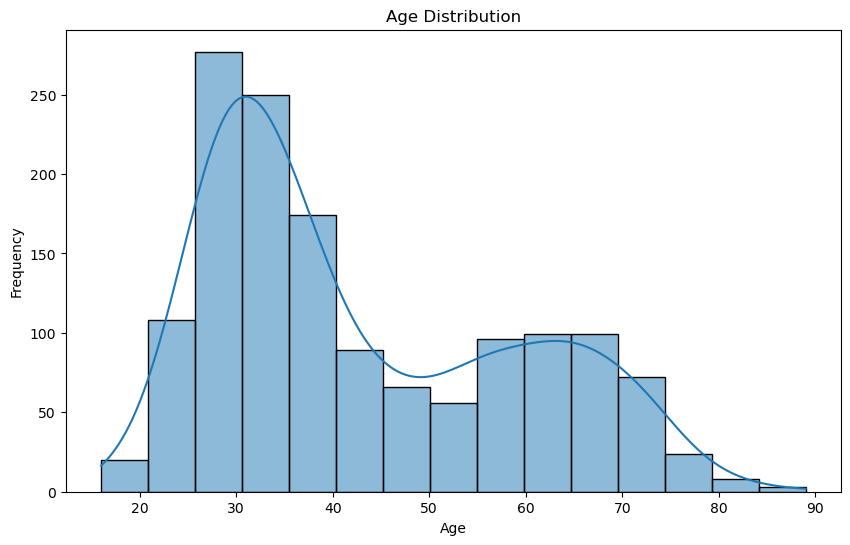

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['DEMO_age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

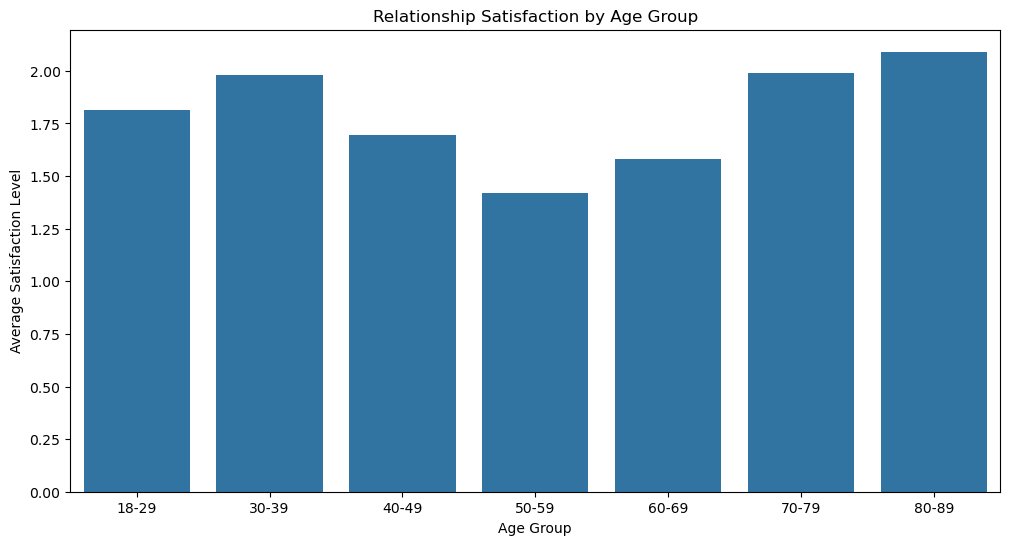

In [12]:
data['age_group'] = pd.cut(data['DEMO_age'], bins=[18, 29, 39, 49, 59, 69, 79, 89], labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])

plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='WELLNESS_satisfied_relationship', data=data, errorbar=None)
plt.title('Relationship Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Satisfaction Level')
plt.show()

In [13]:
pearson_corr, pearson_p = pearsonr(data['DEMO_age'], data['WELLNESS_satisfied_relationship'])
spearman_corr, spearman_p = spearmanr(data['DEMO_age'], data['WELLNESS_satisfied_relationship'])

print(f"Pearson correlation: {pearson_corr:.2f}, p-value: {pearson_p:.2e}")
print(f"Spearman correlation: {spearman_corr:.2f}, p-value: {spearman_p:.2e}")

Pearson correlation: -0.07, p-value: 9.76e-03
Spearman correlation: 0.00, p-value: 9.22e-01


### Result

- ***Analysis***
> 
> This study analyzed the association between age and relationship satisfaction.The Pearson correlation coefficient of -0.07 was statistically significant (p < 0.05), indicating a weak negative correlation. However, the magnitude of the correlation was small, suggesting that the actual effect of age on relationship satisfaction may not be significant.Spearman correlation analysis did not find a significant association (p > 0.05), further supporting the conclusion of a weak correlation between the variables.

- ***Exlpain***
>
> The results show that although there is a slight decrease in relationship satisfaction as age increases, the magnitude of this change is very small and is not sufficient to indicate that age is a major factor influencing satisfaction. This may be due to the fact that relationship satisfaction is influenced by a number of factors, including an individual's personality, living environment, social circle, and health condition, of which age is only a minor factor. In addition, the non-significant results of Spearman's correlation analysis further indicate that the rank correlation between age and relationship satisfaction is not significant, supporting this weak correlation.


# Research Question 2
## Are there significant differences in household income by gender?

### Vriables
1. ***"DEMO_gender***

- The gender variable indicates the gender categorization of the respondent and usually includes the options “male”, “female” and “other”.

- Bar charts can be used to show the distribution of income by gender.

2. ***"DEMO_household_income"***

- Household income indicates the annual income range of the respondent's household, which may be categorized into different income ranges.

- A box plot showing the median and distribution of incomes by gender can be used to observe differences in the distribution of incomes.

### Method and Hypothesis

***Method***
>
> Comparative between-group analyses (e.g., t-tests or Mann-Whitney U-tests) can be used to determine whether there are significant differences in the distribution of income by gender. In addition, the distribution of income by gender can be visualized using box plot or distribution plots.

***Hypothesis***
>
> There are significant differences in the distribution of household income by gender.

In [25]:
print(data['DEMO_gender'].unique())

['Non-binary' 'Woman' 'Man' 'Presented but no response'
 'Non-binary (including those identifying as Two Spirit, agender, genderfluid, genderqueer, or with another term)']


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# Loading data
data = pd.read_csv('/home/jovyan/HW/Project/CSCS_data_anon-2.csv', low_memory=False) 

# select columns and delete missing values
data = data[['DEMO_gender', 'DEMO_household_income']].dropna()

data = data[~data['DEMO_household_income'].isin(['Presented but no response', 'Not applicable'])]

def convert_income(income_str):
    if isinstance(income_str, str):
        income_str = income_str.replace('$', '').replace(',', '').strip()
        
        if 'to' in income_str:
            low, high = income_str.split(' to ')
            return (float(low) + float(high)) / 2  
        elif 'Under' in income_str:
            return 5000 / 2  
        elif 'Over' in income_str:
            return 100000 
        elif 'or more' in income_str:
            return 20000
        else:
            return float(income_str)
    return income_str

data['DEMO_household_income'] = data['DEMO_household_income'].apply(convert_income)
data = data.dropna(subset = ['DEMO_household_income'])

data_filtered = data[data['DEMO_gender'].isin(['Man', 'Woman'])]

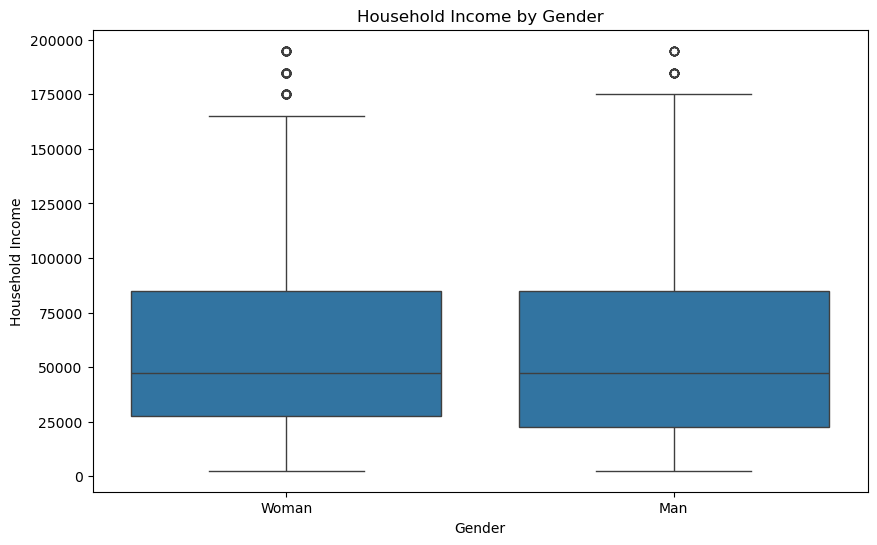

In [27]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEMO_gender', y='DEMO_household_income', data=data_filtered)
plt.title('Household Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Household Income')
plt.show()

In [28]:
man_income = data_filtered[data_filtered['DEMO_gender'] == 'Man']['DEMO_household_income']
woman_income = data_filtered[data_filtered['DEMO_gender'] == 'Woman']['DEMO_household_income']

t_stat, t_p = ttest_ind(man_income, woman_income, equal_var=False)
print(f"T-test: t-statistic = {t_stat:.2f}, p-value = {t_p:.3f}")

u_stat, u_p = mannwhitneyu(man_income, woman_income)
print(f"Mann-Whitney U test: u-statistic = {u_stat:.2f}, p-value = {u_p:.3f}")

T-test: t-statistic = -0.56, p-value = 0.573
Mann-Whitney U test: u-statistic = 4522730.00, p-value = 0.342


### Result

I conducted a test of difference between gender and household income. both the t-test result (t = -0.56, p = 0.573) and the Mann-Whitney U-test result (U = 4522730.00, p = 0.342) indicate that the difference in income between genders is not statistically significant. Therefore, it can be concluded that there is no significant difference in the level of household income between males and females in the present dataset.

# Research Question 3
## Does the length of work affect people's existential loneliness?

### Variables

1. ***WORK_hours_per_week***

- Self-reporting of hours worked per week.

- Use a histogram to observe the distribution of hours worked.

2. ***LONELY_existential_loneliness_scale_outlook***
- A measure of the respondent's score on the Existential Loneliness Scale may indicate the strength of loneliness.

- Using a box plot to compare existential loneliness scores for different work-hour groups.

### Method and Hypothesis

***Method***
> 
> Correlation analysis was used to determine the association between work hours and existential loneliness. In addition, work hours can be grouped by intervals in order to observe the distribution of loneliness in different work hour groups.

***Hypothesis***
>
> There is a positive or negative correlation between work hours and existential loneliness.

In [35]:
import pandas as pd

data = pd.read_csv('/home/jovyan/HW/Project/CSCS_data_anon-2.csv', low_memory=False)  

print(data['WORK_hours_per_week'].unique())
print('else')
print(data['LONELY_existential_loneliness_scale_outlook'].unique())

[  nan   0.   30.   10.    6.   21.   18.   40.   35.   13.    3.   28.
   5.   48.   15.   37.    8.    2.   36.  140.   32.   25.   26.   50.
  45.   20.   43.   58.   24.   29.   44.   23.   38.    4.   60.   49.
  22.    9.   47.    7.   37.5  12.   16.   70.   65.   42.   55.   46.
  11.   33.   56.   14.   41.   84.   27.  120.    1.  168.  166.   17.
  64.  105.   90.   34.   36.3  63.   31.   19.   80.  103.  112.   32.5
 110.   86.   76.   88.   62.  153.   17.5  51.   71.   87.  130.   54.
  39.   72.   42.5  85.   98.   66.   52.   75. ]
else
[nan '8' '6' '2' '(1) Strongly Agree' '4' '5' '3' '7'
 '(9) Strongly Disagree' 'Presented but no response']


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

data = pd.read_csv('/home/jovyan/HW/Project/CSCS_data_anon-2.csv', low_memory=False) 

data = data[['WORK_hours_per_week', 'LONELY_existential_loneliness_scale_outlook']].dropna()

data = data.dropna(subset=['WORK_hours_per_week'])

In [38]:
valid_loneliness_responses = ['(1) Strongly Agree', '(2)', '(3)', '(4)', '(5)', '(6)', '(7)', '(9) Strongly Disagree']
data = data[data['LONELY_existential_loneliness_scale_outlook'].isin(valid_loneliness_responses)]

response_mapping = {
    '(1) Strongly Agree': 1,
    '(2)': 2,
    '(3)': 3,
    '(4)': 4,
    '(5)': 5,
    '(6)': 6,
    '(7)': 7,
    '(9) Strongly Disagree': 9
}
data['LONELY_existential_loneliness_scale_outlook'] = data['LONELY_existential_loneliness_scale_outlook'].map(response_mapping)

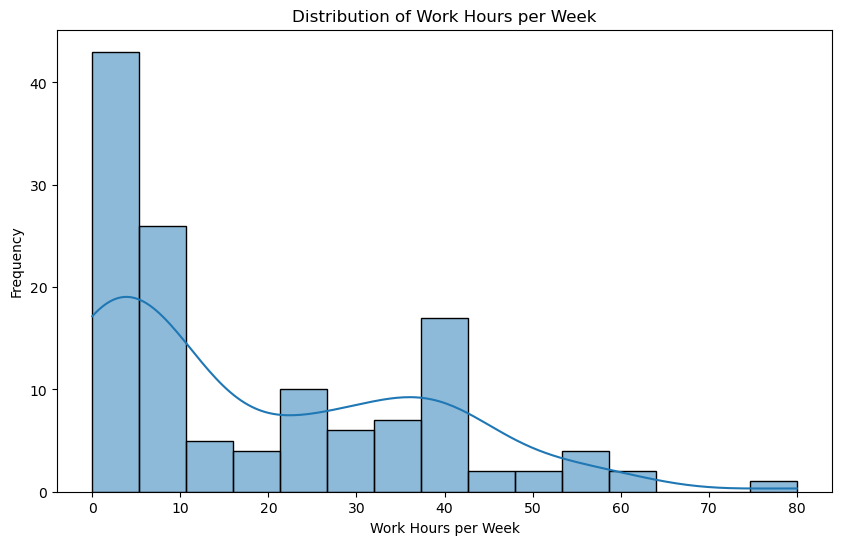

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data['WORK_hours_per_week'], bins=15, kde=True)
plt.title('Distribution of Work Hours per Week')
plt.xlabel('Work Hours per Week')
plt.ylabel('Frequency')
plt.show()

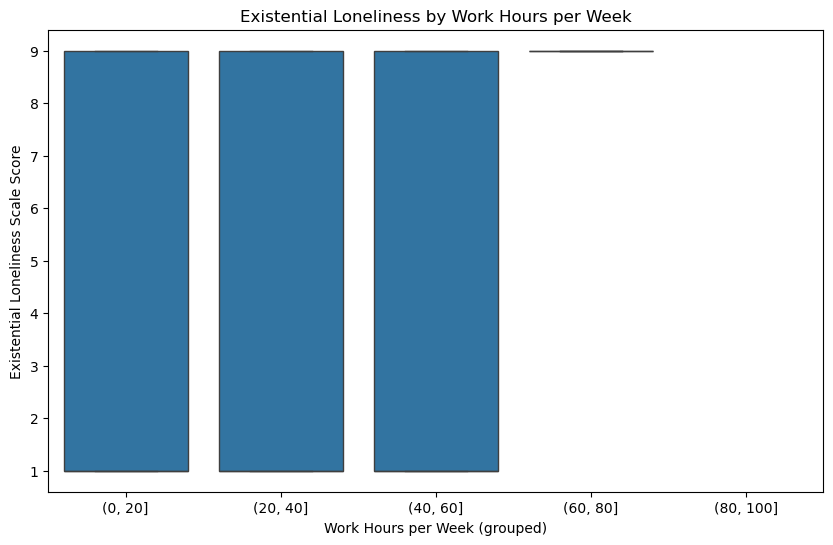

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(data['WORK_hours_per_week'], bins=[0, 20, 40, 60, 80, 100]),
            y='LONELY_existential_loneliness_scale_outlook', data=data)
plt.title('Existential Loneliness by Work Hours per Week')
plt.xlabel('Work Hours per Week (grouped)')
plt.ylabel('Existential Loneliness Scale Score')
plt.show()

In [41]:
pearson_corr, pearson_p = pearsonr(data['WORK_hours_per_week'], data['LONELY_existential_loneliness_scale_outlook'])
spearman_corr, spearman_p = spearmanr(data['WORK_hours_per_week'], data['LONELY_existential_loneliness_scale_outlook'])

print(f"Pearson correlation: {pearson_corr:.2f}, p-value: {pearson_p:.3f}")
print(f"Spearman correlation: {spearman_corr:.2f}, p-value: {spearman_p:.3f}")

Pearson correlation: -0.08, p-value: 0.359
Spearman correlation: -0.12, p-value: 0.162


### Result

I conducted a correlation analysis of the relationship between hours worked and existential loneliness. The results showed that the Pearson correlation coefficient was -0.08 (p = 0.359) and the Spearman correlation coefficient was -0.12 (p = 0.162), neither of which reached statistical significance. Therefore, we can conclude that the effect of working hours on existential loneliness is not significant in the present dataset.